<a href="https://colab.research.google.com/github/akhil189/Deep-Learning-in-Tensorflow-2.0/blob/master/CNNs/Image%20Classification/Cats%20vs%20Dogs%20Dataset/Image_Classification_CatsvsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',  force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
% tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from PIL import Image
import numpy as np
import IPython.display as display
import matplotlib.pyplot as plt
import pathlib
import os
import glob
import zipfile

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [0]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#     -O /tmp/cats_and_dogs_filtered.zip

In [0]:
# local_zip = '/tmp/cats_and_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content/gdrive/My Drive/Tensorflow/Google_Image_Classification')
# zip_ref.close()

In [0]:
base_dir  = '/content/gdrive/My Drive/Tensorflow/Google_Image_Classification/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(val_dir, 'cats')
validation_dogs_dir = os.path.join(val_dir, 'dogs')

In [0]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])
train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.127.jpg', 'cat.126.jpg', 'cat.125.jpg', 'cat.124.jpg', 'cat.123.jpg', 'cat.122.jpg', 'cat.121.jpg', 'cat.120.jpg', 'cat.119.jpg', 'cat.118.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [0]:
train_count = len(os.listdir(train_dir))
val_count = len(os.listdir(val_dir))

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [0]:
BATCH_SIZE = 20
IMG_HEIGHT = 150
IMG_WIDTH  = 150
STEPS_PER_EPOCH = np.ceil(train_count/BATCH_SIZE)

In [0]:
image_gen_train  =  tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                    rotation_range=40,
                                                                    width_shift_range=0.2,
                                                                    height_shift_range=0.2,
                                                                    shear_range=0.2,
                                                                    zoom_range=0.2,
                                                                    horizontal_flip=True,)

In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     #shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [0]:
image_gen_val = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [0]:
val_data_gen = image_gen_val.flow_from_directory( batch_size = BATCH_SIZE,
                                                  directory  = val_dir,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(20):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(label_batch[n])
      plt.axis('off')

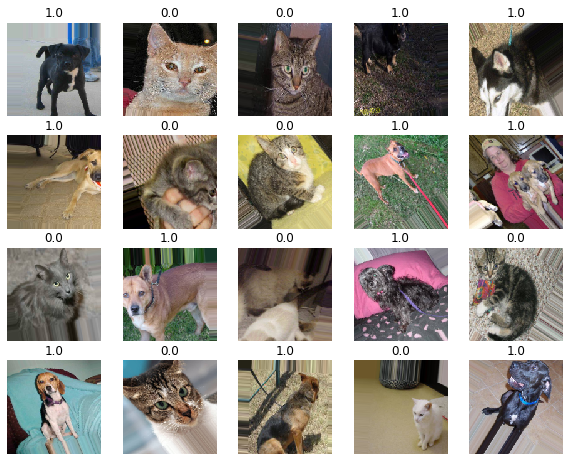

In [0]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [0]:
label_batch

array([1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1.], dtype=float32)

In [0]:
len(label_batch)

20

In [0]:
print(IMG_HEIGHT, IMG_WIDTH)

150 150


In [0]:
model = tf.keras.Sequential([ Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
                              MaxPooling2D(2),
                              Conv2D(32, 3, activation='relu'),
                              MaxPooling2D(),
                              Conv2D(64, 3, activation='relu'),
                              MaxPooling2D(2),
                              Flatten(),
                              Dense(512, activation='relu'),
                              Dropout(0.5),
                              Dense(1, activation='sigmoid')  ])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

In [0]:
history = model.fit_generator(  train_data_gen,
                                steps_per_epoch=100,  # 2000 images = batch_size * steps
                                epochs=100,
                                validation_data=val_data_gen,
                                validation_steps=50,  # 1000 images = batch_size * steps
                                verbose=2)

Epoch 1/100
100/100 - 1010s - loss: 0.8609 - acc: 0.5225 - val_loss: 0.6817 - val_acc: 0.5390
Epoch 2/100
100/100 - 24s - loss: 0.6862 - acc: 0.5665 - val_loss: 0.6795 - val_acc: 0.5860
Epoch 3/100
100/100 - 24s - loss: 0.6615 - acc: 0.6260 - val_loss: 0.6441 - val_acc: 0.6020
Epoch 4/100
100/100 - 24s - loss: 0.6514 - acc: 0.6355 - val_loss: 0.5822 - val_acc: 0.6900
Epoch 5/100
100/100 - 24s - loss: 0.6240 - acc: 0.6595 - val_loss: 0.5839 - val_acc: 0.6900
Epoch 6/100
100/100 - 24s - loss: 0.6197 - acc: 0.6690 - val_loss: 0.5780 - val_acc: 0.6910
Epoch 7/100
100/100 - 23s - loss: 0.6175 - acc: 0.6555 - val_loss: 0.5734 - val_acc: 0.7030
Epoch 8/100
100/100 - 24s - loss: 0.6064 - acc: 0.6865 - val_loss: 0.5702 - val_acc: 0.7000
Epoch 9/100
100/100 - 24s - loss: 0.5937 - acc: 0.6825 - val_loss: 0.5676 - val_acc: 0.6880
Epoch 10/100
100/100 - 24s - loss: 0.5904 - acc: 0.6875 - val_loss: 0.5459 - val_acc: 0.7140
Epoch 11/100
100/100 - 24s - loss: 0.5782 - acc: 0.6980 - val_loss: 0.5493 - 

In [0]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

NameError: ignored

In [0]:
print('Final Accuracy on Val:{}'.format(val_loss[-1]))

Final Accuracy on Val:0.5739211958646774


In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)